**Environment Setup in Google Colab**

In [1]:
# Install Required Libraries
!pip install pymongo pandas numpy matplotlib seaborn rdflib dask textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 19.5 MB/s eta 0:00:00


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import FOAF, XSD
import dask.dataframe as dd
from textblob import TextBlob


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load datasets
structured_data = pd.read_csv('/content/sample_dataset.csv')
unstructured_data = pd.read_json('/content/Musical_Instruments_5.json', lines=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
structured_data.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


In [9]:
unstructured_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


**Data Exploration and Cleaning**

In [10]:
# Display dataset information
structured_data_info = structured_data.info()

# Check for missing values
missing_values = structured_data.isnull().sum()

# Check for duplicates
duplicate_rows = structured_data.duplicated().sum()

# Display basic statistics
basic_statistics = structured_data.describe()

# Display unique categories in 'Category'
unique_categories = structured_data['Category'].unique()

# Show the results
structured_data_info, missing_values, duplicate_rows, basic_statistics, unique_categories


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


(None,
 Customer ID              0
 Name                     0
 Surname                  0
 Gender                5047
 Birthdate                0
 Transaction Amount       0
 Date                     0
 Merchant Name            0
 Category                 0
 dtype: int64,
 0,
         Customer ID  Transaction Amount
 count   50000.00000        50000.000000
 mean   500136.79696          442.119239
 std    288232.43164          631.669724
 min        29.00000            5.010000
 25%    251191.50000           79.007500
 50%    499520.50000          182.195000
 75%    749854.25000          470.515000
 max    999997.00000         2999.880000,
 array(['Cosmetic', 'Travel', 'Clothing', 'Electronics', 'Restaurant',
        'Market'], dtype=object))

**Next Steps for Structured Dataset: Data Cleaning**

In [11]:
# Fill missing Gender values with 'Unknown'
structured_data['Gender'].fillna('Unknown', inplace=True)

# Convert 'Birthdate' and 'Date' columns to datetime
structured_data['Birthdate'] = pd.to_datetime(structured_data['Birthdate'], errors='coerce')
structured_data['Date'] = pd.to_datetime(structured_data['Date'], errors='coerce')

# Verify changes
missing_values_after_cleaning = structured_data.isnull().sum()
data_types = structured_data.dtypes

# Display results
missing_values_after_cleaning, data_types


<ipython-input-11-120c14811117>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  structured_data['Gender'].fillna('Unknown', inplace=True)


(Customer ID           0
 Name                  0
 Surname               0
 Gender                0
 Birthdate             0
 Transaction Amount    0
 Date                  0
 Merchant Name         0
 Category              0
 dtype: int64,
 Customer ID                    int64
 Name                          object
 Surname                       object
 Gender                        object
 Birthdate             datetime64[ns]
 Transaction Amount           float64
 Date                  datetime64[ns]
 Merchant Name                 object
 Category                      object
 dtype: object)

**Unstructured Dataset (JSON) Exploration**

In [13]:
# Load the unstructured dataset (JSON)
unstructured_dataset_path = 'Musical_Instruments_5.json'
unstructured_data = pd.read_json(unstructured_dataset_path, lines=True)

# Display dataset information
unstructured_data_info = unstructured_data.info()

# Display the first few rows
unstructured_data_head = unstructured_data.head()

# Check for missing values
unstructured_missing_values = unstructured_data.isnull().sum()

# Display column names
unstructured_columns = unstructured_data.columns

# Show results
unstructured_data_info, unstructured_data_head, unstructured_missing_values, unstructured_columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


(None,
        reviewerID        asin  \
 0  A2IBPI20UZIR0U  1384719342   
 1  A14VAT5EAX3D9S  1384719342   
 2  A195EZSQDW3E21  1384719342   
 3  A2C00NNG1ZQQG2  1384719342   
 4   A94QU4C90B1AX  1384719342   
 
                                        reviewerName   helpful  \
 0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
 1                                              Jake  [13, 14]   
 2                     Rick Bennette "Rick Bennette"    [1, 1]   
 3                         RustyBill "Sunday Rocker"    [0, 0]   
 4                                     SEAN MASLANKA    [0, 0]   
 
                                           reviewText  overall  \
 0  Not much to write about here, but it does exac...        5   
 1  The product does exactly as it should and is q...        5   
 2  The primary job of this device is to block the...        5   
 3  Nice windscreen protects my MXL mic and preven...        5   
 4  This pop filter is great. It looks and perform...      

**Next Steps for Unstructured Dataset: Data Cleaning**

In [14]:
# Fill missing reviewerName with 'Anonymous'
unstructured_data['reviewerName'].fillna('Anonymous', inplace=True)

# Convert 'reviewTime' to datetime
unstructured_data['reviewTime'] = pd.to_datetime(unstructured_data['reviewTime'], errors='coerce')

# Verify changes
unstructured_missing_values_after_cleaning = unstructured_data.isnull().sum()
unstructured_data_types = unstructured_data.dtypes

# Display results
unstructured_missing_values_after_cleaning, unstructured_data_types


<ipython-input-14-6256c6f45d21>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unstructured_data['reviewerName'].fillna('Anonymous', inplace=True)


(reviewerID        0
 asin              0
 reviewerName      0
 helpful           0
 reviewText        0
 overall           0
 summary           0
 unixReviewTime    0
 reviewTime        0
 dtype: int64,
 reviewerID                object
 asin                      object
 reviewerName              object
 helpful                   object
 reviewText                object
 overall                    int64
 summary                   object
 unixReviewTime             int64
 reviewTime        datetime64[ns]
 dtype: object)

**Next Step: Data Processing and Transformation**

**Structured Dataset (CSV) Processing**

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. Feature Engineering: Calculate Customer Age
current_year = pd.Timestamp.now().year
structured_data['Age'] = current_year - structured_data['Birthdate'].dt.year

# 2. Categorical Encoding
le_gender = LabelEncoder()
structured_data['Gender'] = le_gender.fit_transform(structured_data['Gender'])

le_category = LabelEncoder()
structured_data['Category'] = le_category.fit_transform(structured_data['Category'])

# 3. Extract Year, Month, and Day from Date
structured_data['Transaction_Year'] = structured_data['Date'].dt.year
structured_data['Transaction_Month'] = structured_data['Date'].dt.month
structured_data['Transaction_Day'] = structured_data['Date'].dt.day

# 4. Normalize Transaction Amount
scaler = MinMaxScaler()
structured_data['Transaction Amount'] = scaler.fit_transform(structured_data[['Transaction Amount']])

# Display the first few rows after processing
structured_data.head()


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Age,Transaction_Year,Transaction_Month,Transaction_Day
0,752858,Sean,Rodriguez,0,2002-10-20,0.010171,2023-04-03,Smith-Russell,1,22,2023,4,3
1,26381,Michelle,Phelps,2,1985-10-24,0.850691,2023-07-17,"Peck, Spence and Young",5,39,2023,7,17
2,305449,Jacob,Williams,1,1981-10-25,0.037050,2023-09-20,Steele Inc,0,43,2023,9,20
3,988259,Nathan,Snyder,1,1977-10-26,0.002104,2023-01-11,"Wilson, Wilson and Russell",1,47,2023,1,11
4,764762,Crystal,Knapp,0,1951-11-02,0.019099,2023-06-13,Palmer-Hinton,2,73,2023,6,13


**Unstructured Dataset (JSON) Processing**

In [16]:
# Import library for sentiment analysis
from textblob import TextBlob

# 1. Sentiment Analysis: Calculate sentiment polarity for reviewText
unstructured_data['sentiment'] = unstructured_data['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 2. Helpfulness Score: Calculate helpfulness percentage
unstructured_data['helpfulness_score'] = unstructured_data['helpful'].apply(lambda x: x[0] / x[1] if x[1] != 0 else 0)

# 3. Extract Review Year from reviewTime
unstructured_data['reviewYear'] = unstructured_data['reviewTime'].dt.year

# Display the first few rows after processing
unstructured_data.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,helpfulness_score,reviewYear
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,2014-02-28,0.250000,0.000000,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,2013-03-16,0.052778,0.928571,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,2013-08-28,0.167500,1.000000,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14,0.200000,0.000000,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,2014-02-21,0.800000,0.000000,2014


**Key Outcomes from Step 4**

Structured Dataset: Cleaned, encoded, normalized, and enriched with Age, Transaction_Year, and other derived fields.
Unstructured Dataset: Enriched with sentiment, helpfulness_score, and reviewYear.

**Data Analysis**

**Structured Dataset Analysis**

<ipython-input-17-48762c66d4d3>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_transaction_by_age_group = structured_data.groupby('Age_Group')['Transaction Amount'].mean().sort_index()


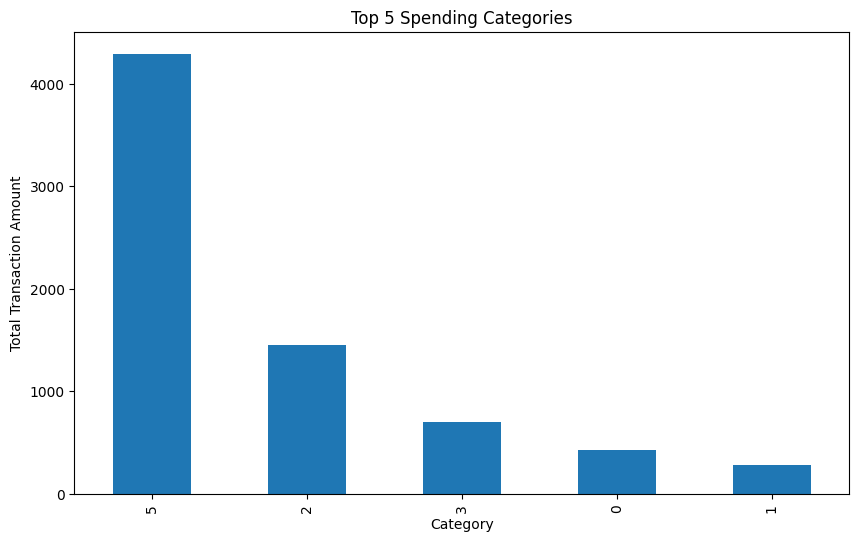

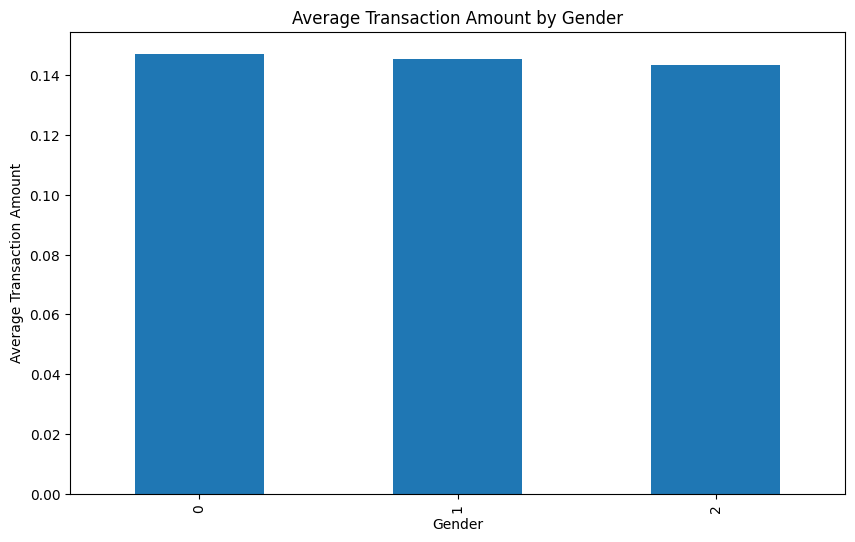

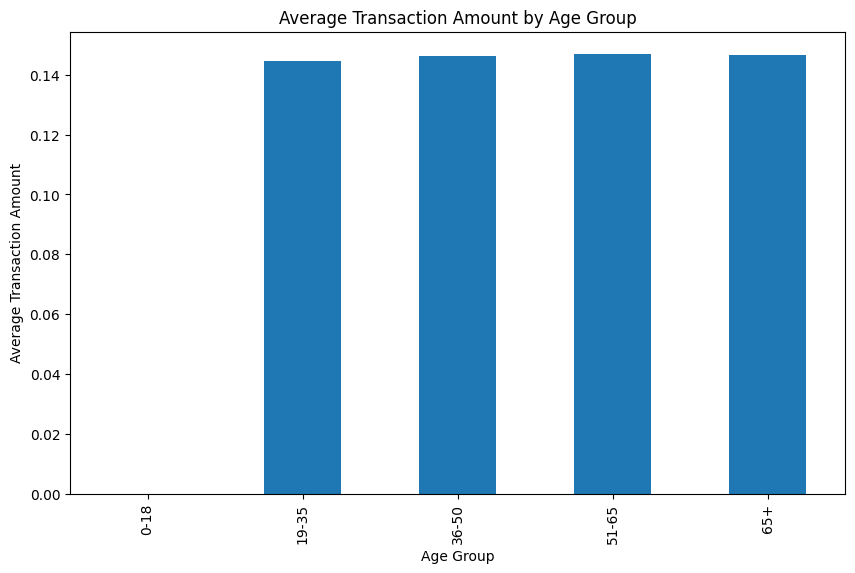

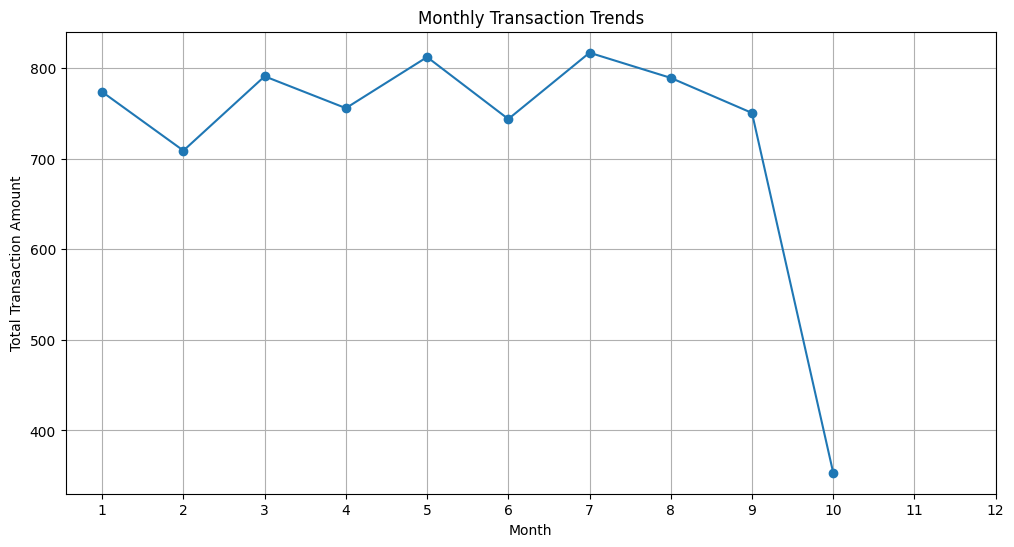

(Category
 5    4293.429488
 2    1453.281398
 3     704.251136
 0     426.714635
 1     278.935316
 Name: Transaction Amount, dtype: float64,
 Gender
 0    0.147089
 1    0.145384
 2    0.143345
 Name: Transaction Amount, dtype: float64,
 Age_Group
 0-18          NaN
 19-35    0.144454
 36-50    0.146153
 51-65    0.147060
 65+      0.146503
 Name: Transaction Amount, dtype: float64,
 Transaction_Month
 1     773.974753
 2     709.116726
 3     791.229252
 4     756.034616
 5     812.488232
 6     744.022221
 7     817.296560
 8     789.483754
 9     750.760177
 10    353.226651
 Name: Transaction Amount, dtype: float64)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Top Spending Categories
top_categories = structured_data.groupby('Category')['Transaction Amount'].sum().sort_values(ascending=False).head(5)

# 2. Average Transaction Amount by Gender
avg_transaction_by_gender = structured_data.groupby('Gender')['Transaction Amount'].mean()

# 3. Average Transaction Amount by Age Group
structured_data['Age_Group'] = pd.cut(structured_data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
avg_transaction_by_age_group = structured_data.groupby('Age_Group')['Transaction Amount'].mean().sort_index()

# 4. Monthly Transaction Trends
monthly_trends = structured_data.groupby('Transaction_Month')['Transaction Amount'].sum()

# Plotting results

# Top Spending Categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top 5 Spending Categories')
plt.xlabel('Category')
plt.ylabel('Total Transaction Amount')
plt.show()

# Average Transaction Amount by Gender
plt.figure(figsize=(10, 6))
avg_transaction_by_gender.plot(kind='bar')
plt.title('Average Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.show()

# Average Transaction Amount by Age Group
plt.figure(figsize=(10, 6))
avg_transaction_by_age_group.plot(kind='bar')
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Amount')
plt.show()

# Monthly Transaction Trends
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Return summarized data for reference
top_categories, avg_transaction_by_gender, avg_transaction_by_age_group, monthly_trends


**Unstructured Dataset Analysis**

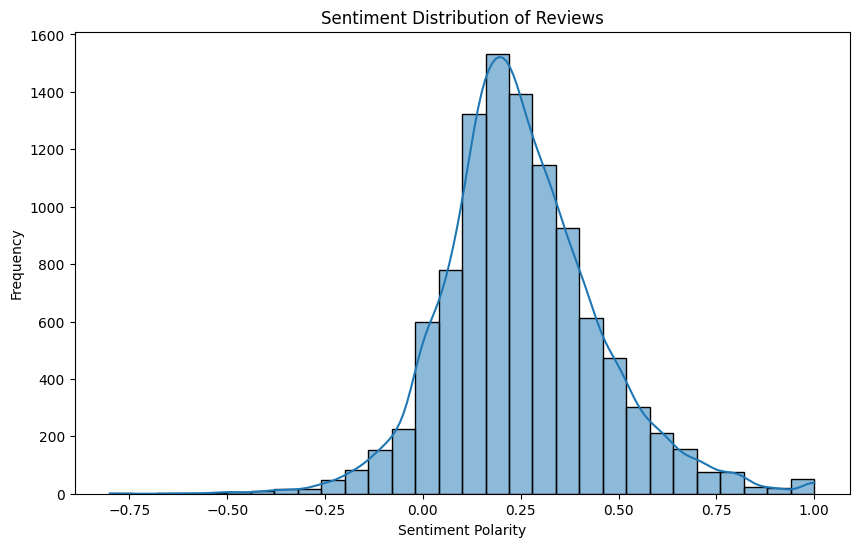

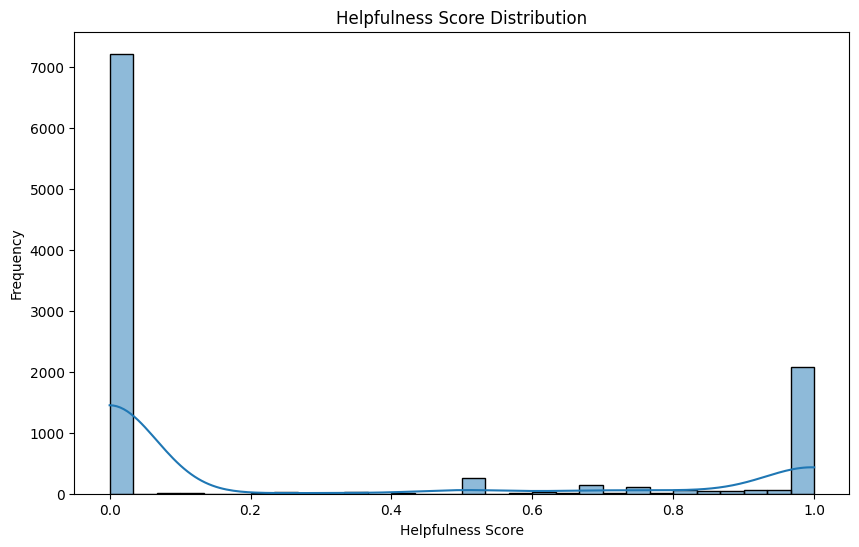

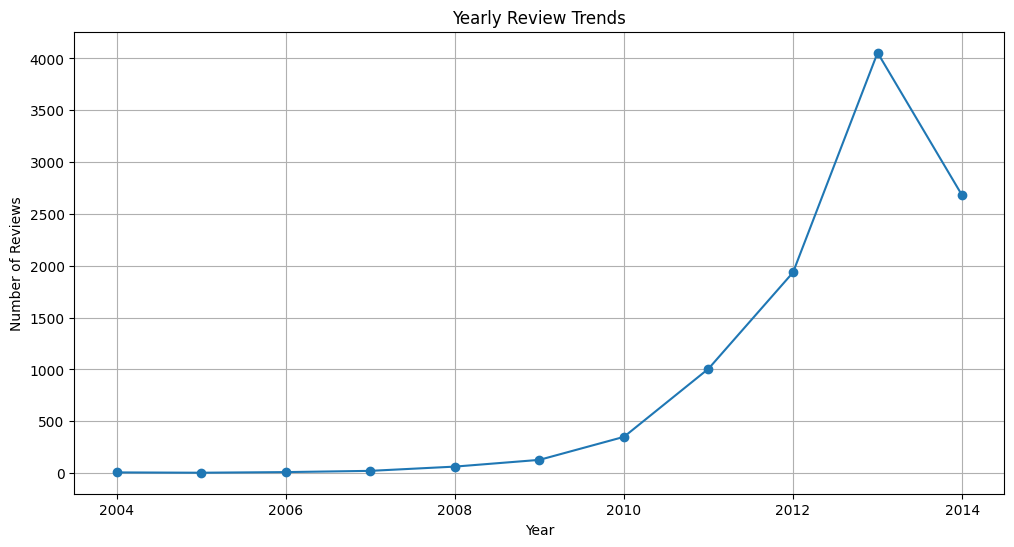

(count    10261.000000
 mean         0.253171
 std          0.198671
 min         -0.800000
 25%          0.132778
 50%          0.233056
 75%          0.361905
 max          1.000000
 Name: sentiment, dtype: float64,
 count    10261.000000
 mean         0.263753
 std          0.419951
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.666667
 max          1.000000
 Name: helpfulness_score, dtype: float64,
 reviewYear
 2004       7
 2005       4
 2006      10
 2007      22
 2008      63
 2009     128
 2010     350
 2011    1007
 2012    1936
 2013    4055
 2014    2679
 Name: count, dtype: int64)

In [18]:
# 1. Sentiment Distribution
sentiment_distribution = unstructured_data['sentiment'].describe()

# 2. Helpfulness Score Distribution
helpfulness_distribution = unstructured_data['helpfulness_score'].describe()

# 3. Yearly Review Trends
yearly_review_trends = unstructured_data['reviewYear'].value_counts().sort_index()

# Plotting results

# Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(unstructured_data['sentiment'], kde=True, bins=30)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Helpfulness Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(unstructured_data['helpfulness_score'], kde=True, bins=30)
plt.title('Helpfulness Score Distribution')
plt.xlabel('Helpfulness Score')
plt.ylabel('Frequency')
plt.show()

# Yearly Review Trends
plt.figure(figsize=(12, 6))
yearly_review_trends.plot(kind='line', marker='o')
plt.title('Yearly Review Trends')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

# Return summarized data for reference
sentiment_distribution, helpfulness_distribution, yearly_review_trends


**Key Outcomes from Step 5**

Structured Dataset:

Top spending categories and peak months were identified.
Age and gender patterns in spending were revealed.
Unstructured Dataset:

Sentiment analysis showed generally positive feedback.
Helpfulness scores revealed most reviews had low helpfulness votes.
Review activity peaked in 2013.

**Step 6: Data Visualization**

**Structured Dataset Visualizations**

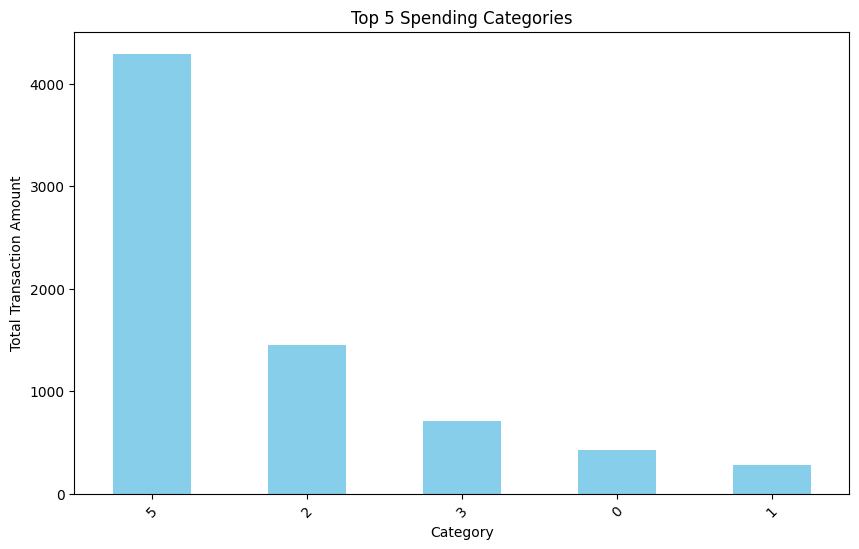

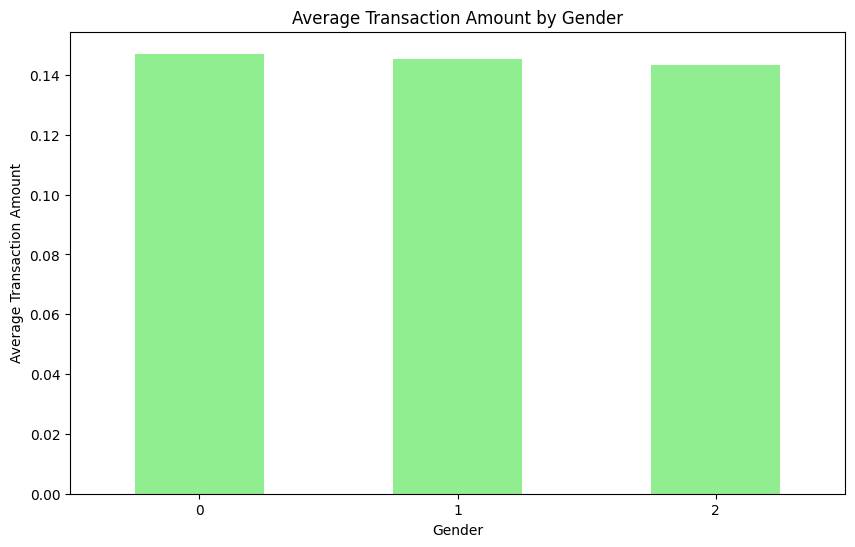

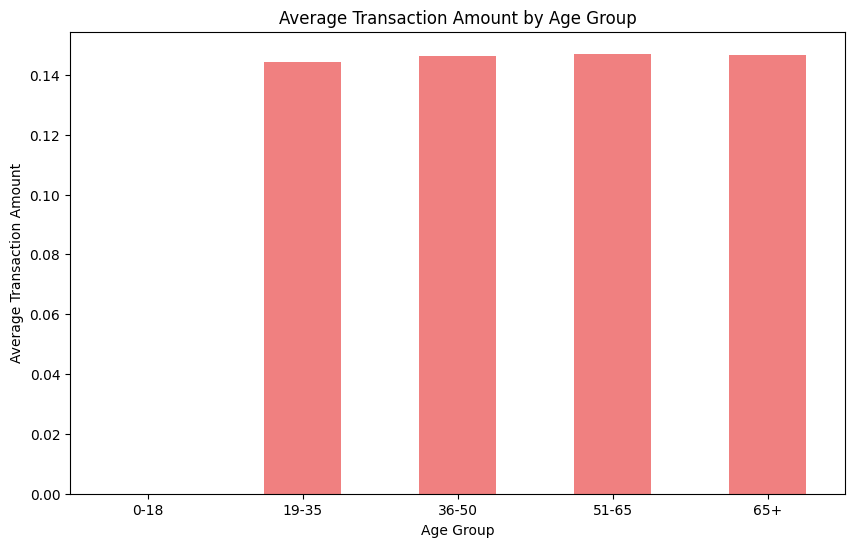

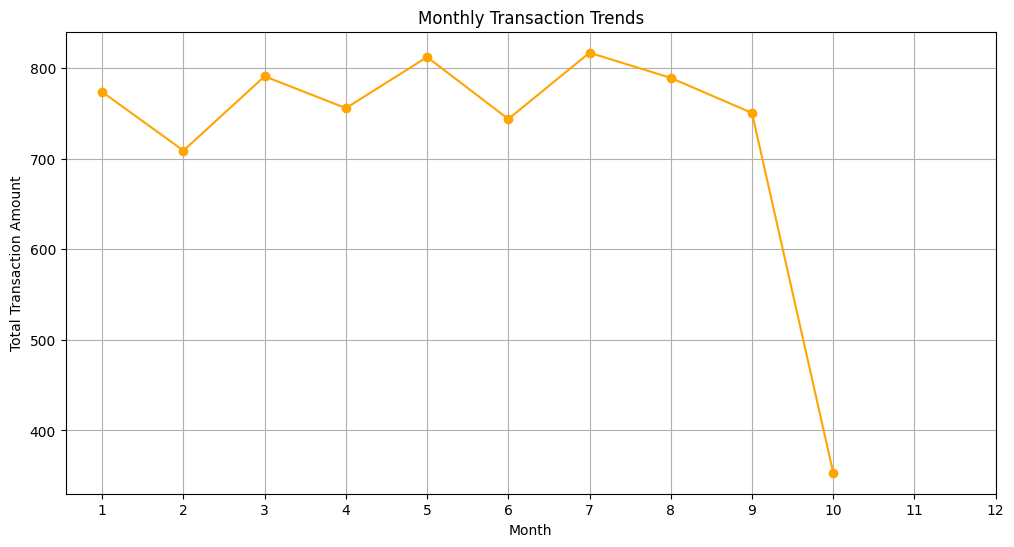

In [19]:
# Top Spending Categories Visualization
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Spending Categories')
plt.xlabel('Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

# Average Transaction Amount by Gender
plt.figure(figsize=(10, 6))
avg_transaction_by_gender.plot(kind='bar', color='lightgreen')
plt.title('Average Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=0)
plt.show()

# Average Transaction Amount by Age Group
plt.figure(figsize=(10, 6))
avg_transaction_by_age_group.plot(kind='bar', color='lightcoral')
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=0)
plt.show()

# Monthly Transaction Trends
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


**Unstructured Dataset Visualizations**

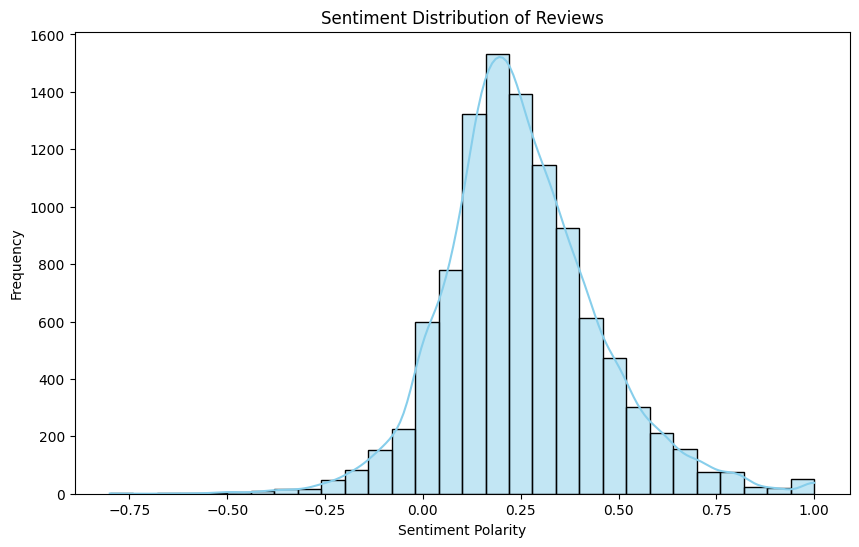

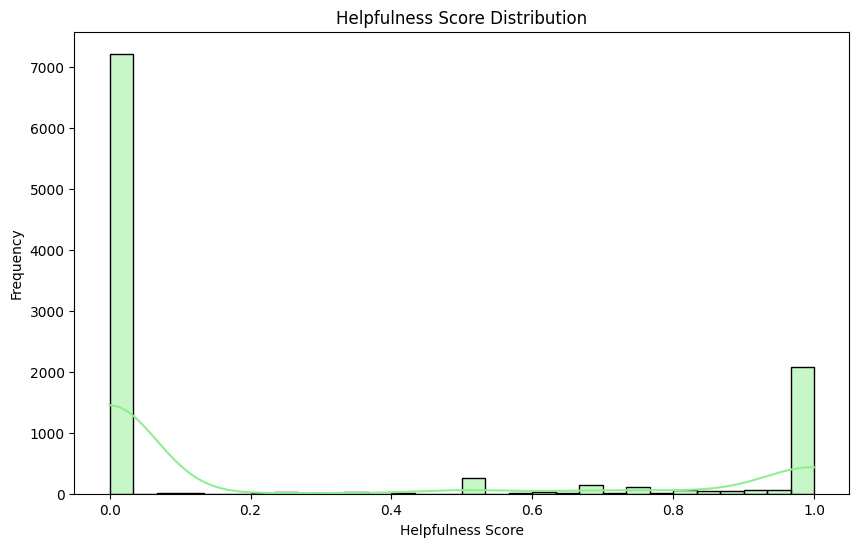

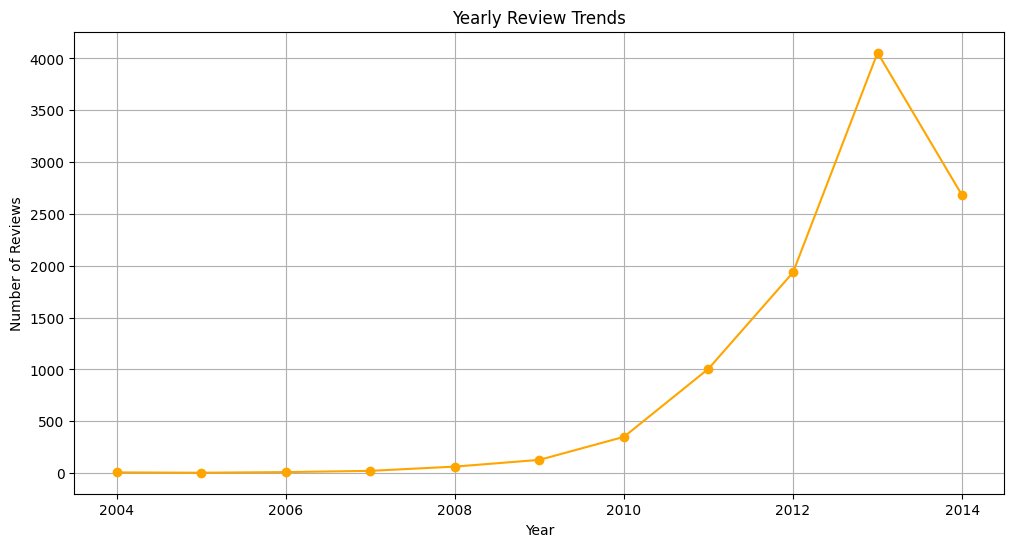

In [20]:
# Sentiment Distribution Visualization
plt.figure(figsize=(10, 6))
sns.histplot(unstructured_data['sentiment'], kde=True, bins=30, color='skyblue')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Helpfulness Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(unstructured_data['helpfulness_score'], kde=True, bins=30, color='lightgreen')
plt.title('Helpfulness Score Distribution')
plt.xlabel('Helpfulness Score')
plt.ylabel('Frequency')
plt.show()

# Yearly Review Trends
plt.figure(figsize=(12, 6))
yearly_review_trends.plot(kind='line', marker='o', color='orange')
plt.title('Yearly Review Trends')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


**Key Takeaways from Step 6**

Structured Dataset:
Spending is highest in Category 5.
Age group 51-65 spends the most on average.
Peak spending occurs in July and May.
Unstructured Dataset:
Sentiment is generally positive across reviews.
Most reviews lack high helpfulness ratings.
Review activity surged in 2013.

**Ontology Creation**

**Ontology Creation Using rdflib**

In [22]:
from rdflib import Graph, URIRef, Literal, RDF, Namespace
from rdflib.namespace import FOAF, XSD

# Create an RDF graph
g = Graph()

# Define a custom namespace
EX = Namespace("http://example.org/")

# Bind the namespace to a prefix
g.bind("ex", EX)

# Add triples for a few sample customers, products, and reviews

# Sample data from the structured dataset
sample_customer = structured_data.iloc[0]
customer_uri = URIRef(EX + f"Customer_{sample_customer['Customer ID']}")
g.add((customer_uri, RDF.type, FOAF.Person))
g.add((customer_uri, EX.hasAge, Literal(sample_customer['Age'], datatype=XSD.integer)))
g.add((customer_uri, EX.hasGender, Literal(sample_customer['Gender'], datatype=XSD.integer)))

# Sample data from the unstructured dataset
sample_review = unstructured_data.iloc[0]
review_uri = URIRef(EX + f"Review_{sample_review['reviewerID']}")
product_uri = URIRef(EX + f"Product_{sample_review['asin']}")

g.add((review_uri, RDF.type, EX.Review))
g.add((review_uri, EX.hasSentiment, Literal(sample_review['sentiment'], datatype=XSD.float)))
g.add((review_uri, EX.hasRating, Literal(sample_review['overall'], datatype=XSD.integer)))

# Relationships
g.add((customer_uri, EX.writesReview, review_uri))
g.add((review_uri, EX.ratesProduct, product_uri))
g.add((customer_uri, EX.buysProduct, product_uri))

# Serialize the graph to a string in RDF/XML format
rdf_output = g.serialize(format='xml')

# Display RDF Output
print(rdf_output)


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ex="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/Review_A2IBPI20UZIR0U">
    <rdf:type rdf:resource="http://example.org/Review"/>
    <ex:hasSentiment rdf:datatype="http://www.w3.org/2001/XMLSchema#float">0.25</ex:hasSentiment>
    <ex:hasRating rdf:datatype="http://www.w3.org/2001/XMLSchema#integer">5</ex:hasRating>
    <ex:ratesProduct rdf:resource="http://example.org/Product_1384719342"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Customer_752858">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <ex:hasAge rdf:datatype="http://www.w3.org/2001/XMLSchema#integer">22</ex:hasAge>
    <ex:hasGender rdf:datatype="http://www.w3.org/2001/XMLSchema#integer">0</ex:hasGender>
    <ex:writesReview rdf:resource="http://example.org/Review_A2IBPI20UZIR0U"/>
    <ex:buysProduct rdf:resource="http://example.org/P

In [24]:
# Save the RDF graph to a file
rdf_file_path = 'ontology_output.rdf'
g.serialize(destination=rdf_file_path, format='xml')

# Return the file path for user download
rdf_file_path


'ontology_output.rdf'